## Civitta default ML model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from civitta.data_loader import DataLoader

df_raw = DataLoader().load()
df_raw.head()

,clientid,client_type,ratio,loan_type,loan_initial_term,loan_initial_amount,loan_to_value_ratio,annual_percentage_rate,monthly_interest_rate,region,branch,client_gender,income,vehicle_production_year,vehicle_initial_assessment_value,age,had_car_loan,had_other_loans
0,0,default,1.166667,leaseback,36,1920,0.200000,35.875763,3.374,region 9,branch 3,male,1214,2002,9600,37.0,0,0
1,1,default,1.027778,leaseback,54,5040,0.777778,36.079749,3.374,NaN,branch 3,male,0,1995,6480,36.0,0,0
2,2,default,0.916667,leasing,18,2400,0.454545,42.292028,3.374,region 2,branch 5,male,720,1999,5280,57.0,0,0
3,3,default,0.916667,leaseback,36,9360,0.886364,35.580055,3.374,NaN,branch 3,female,0,2000,10560,65.0,0,0
4,4,default,0.888889,leasing,54,5760,0.750000,37.090166,3.374,region 6,branch 2,male,0,2008,7680,35.0,0,0


In [3]:
numerical_features = [
    # "ratio", "loan_initial_amount", "income", "vehicle_initial_assessment_value", "age",
    "loan_initial_term", "loan_to_value_ratio",
    "annual_percentage_rate", "monthly_interest_rate",
     "vehicle_production_year",
    # "income",
    ]
numerical_power_features = [
    "ratio", "loan_initial_amount", "vehicle_initial_assessment_value", "age"
]
nominal_features = [
    "loan_type", "region", "branch", "client_gender"
    ]
ordinal_features = [
    "had_car_loan", "had_other_loans"
]

target = "client_type"

In [4]:
from civitta.transform_pipeline import TransformationPipeline

df = df_raw.copy()
transform_pipe = TransformationPipeline()

# nominal data
nominal_data = transform_pipe.nominal_pipeline.fit_transform(df[nominal_features])
nominal_columns = transform_pipe.nominal_pipeline.get_feature_names_out()
X_nominal = pd.DataFrame(nominal_data, columns=nominal_columns)

# ordinal data
X_ordinal = df[ordinal_features]

# numerical data
numerical_data = transform_pipe.numerical_pipeline.fit_transform(df[numerical_features])
numerical_columns = transform_pipe.numerical_pipeline.get_feature_names_out()
X_numerical = pd.DataFrame(numerical_data, columns=numerical_columns)

#numerical Power Transformer 'yeo-johnson', 'box-cox'
numerical_power_data = transform_pipe.numerical_power_pipeline.fit_transform(df[numerical_power_features])
numerical_power_columns = transform_pipe.numerical_power_pipeline.get_feature_names_out()
X_numerical_power = pd.DataFrame(numerical_power_data, columns=numerical_power_columns)

In [5]:
X = pd.concat([X_numerical, X_numerical_power, X_nominal, X_ordinal], axis=1)

In [6]:
X_numerical_power

,ratio,loan_initial_amount,vehicle_initial_assessment_value,age
0,2.056396,-1.765199,0.249108,0.166431
1,1.970296,-0.019932,-0.541725,0.068877
2,1.881895,-1.351519,-0.995029,1.506336
3,1.881895,1.041156,0.426322,1.847253
4,1.856382,0.212723,-0.187611,-0.033135
...,...,...,...,...
10965,-0.633481,1.753777,1.690102,1.727813
10966,-0.112687,-0.291134,-0.187611,-0.033135
10967,-0.164106,-0.291134,-0.319858,-1.579803
10968,0.045934,-1.018100,0.340502,-0.251915


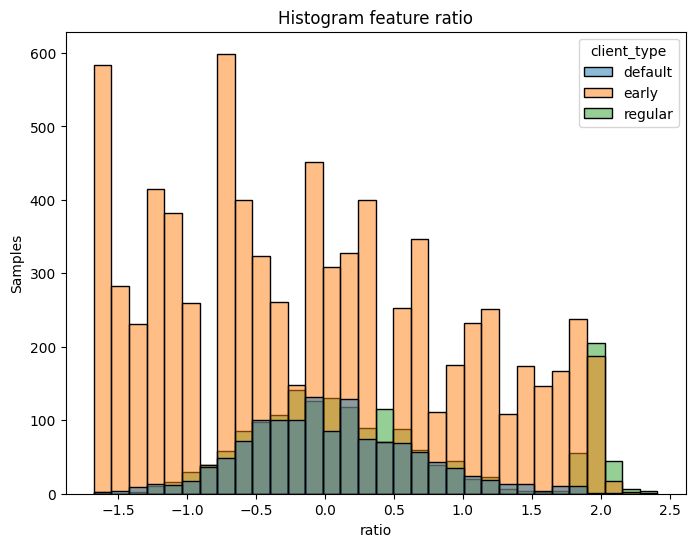

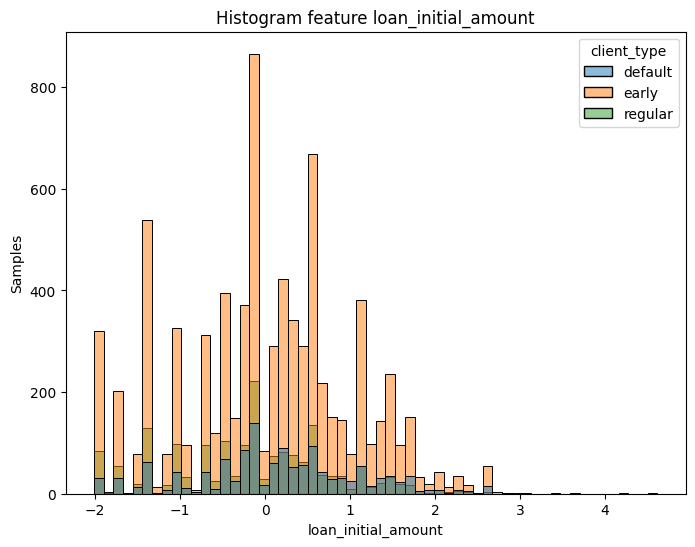

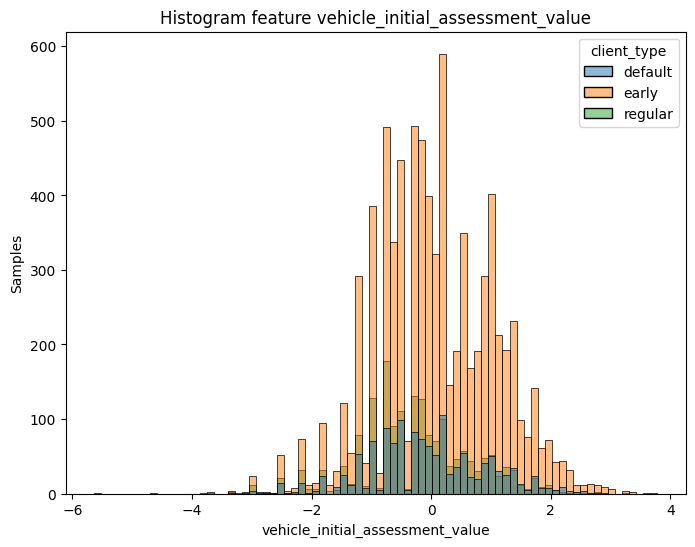

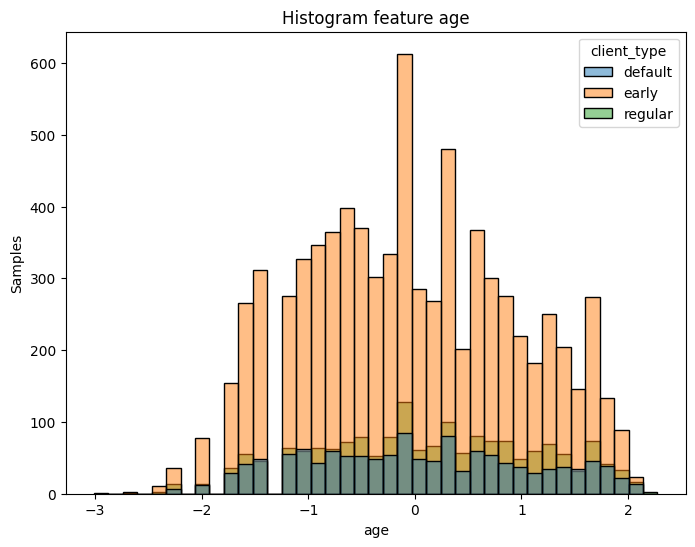

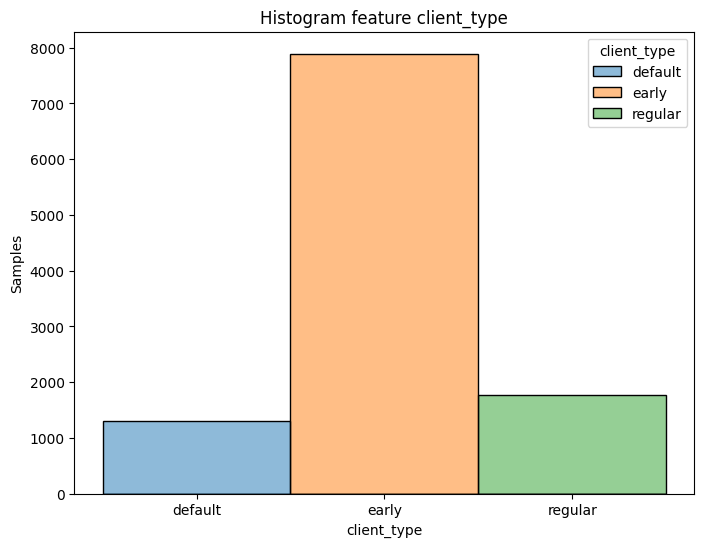

In [7]:
df_plotting_transformed = pd.concat([X_numerical_power, df["client_type"]], axis=1)

for column in df_plotting_transformed.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_plotting_transformed, x=column, hue="client_type")
    plt.title(f'Histogram feature {column}')
    plt.xlabel(column)
    plt.ylabel('Samples')
    plt.show()

Checking outliers

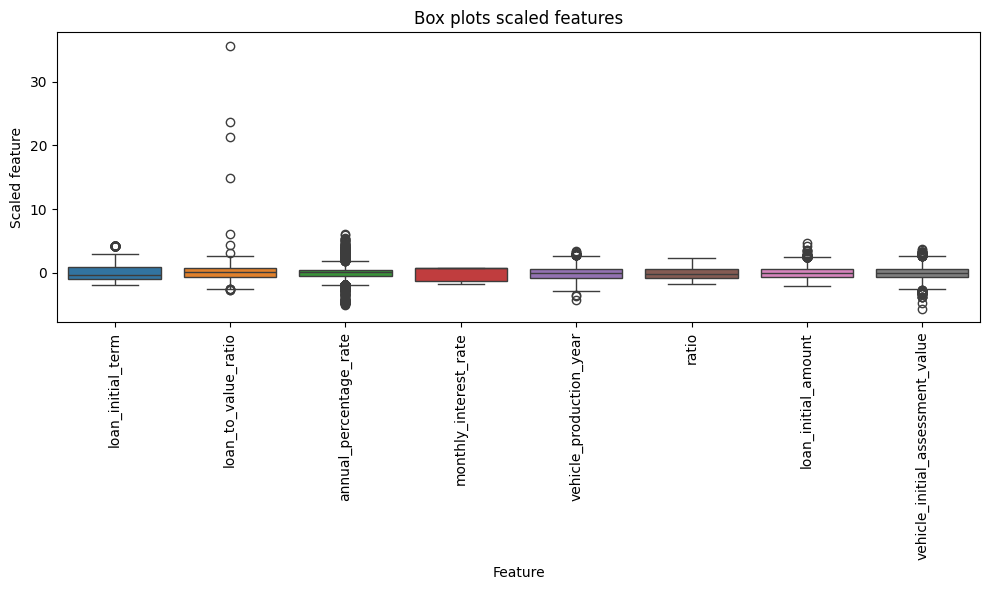

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=X.iloc[:, :8])
plt.title('Box plots scaled features')
plt.xlabel('Feature')
plt.ylabel('Scaled feature')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [14]:
possible_outliers = X[X.values > 10].index

df_raw.iloc[possible_outliers, :]

,clientid,client_type,ratio,loan_type,loan_initial_term,loan_initial_amount,loan_to_value_ratio,annual_percentage_rate,monthly_interest_rate,region,branch,client_gender,income,vehicle_production_year,vehicle_initial_assessment_value,age,had_car_loan,had_other_loans
792,792,default,NaN,leaseback,108,16800,5.833333,35.900157,3.374,region 8,branch 3,female,1440,2007,2880,28.0,0,0
3686,3686,early,0.277778,leaseback,54,9360,8.478261,36.932467,3.374,region 6,branch 3,male,1680,2005,1104,32.0,0,0
4137,4137,early,0.233333,leaseback,90,7680,5.333333,35.990787,3.374,NaN,branch 3,male,0,2002,1440,57.0,0,0
7143,7143,early,0.066667,leaseback,90,16800,3.888889,36.553402,3.374,region 5,branch 3,female,0,2011,4320,26.0,0,0


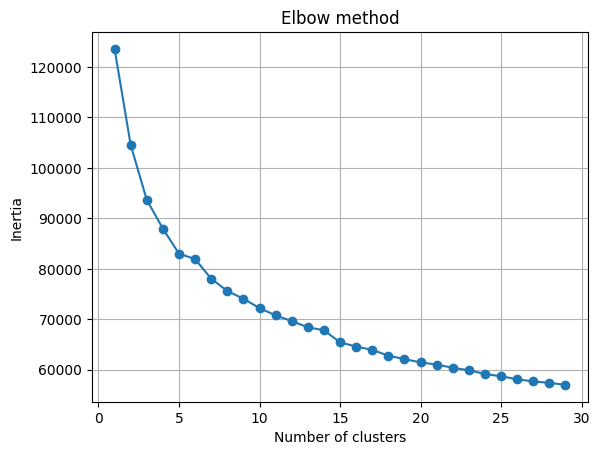

In [15]:
from sklearn.cluster import KMeans

max_clusters = 30
clusters = range(1, max_clusters)
# elbow method
inertia = []
for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(clusters, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.grid()
plt.show()

#### Remove/impute null values

number of samples(1) and outliers (-1): Counter({1: 9972, -1: 998})


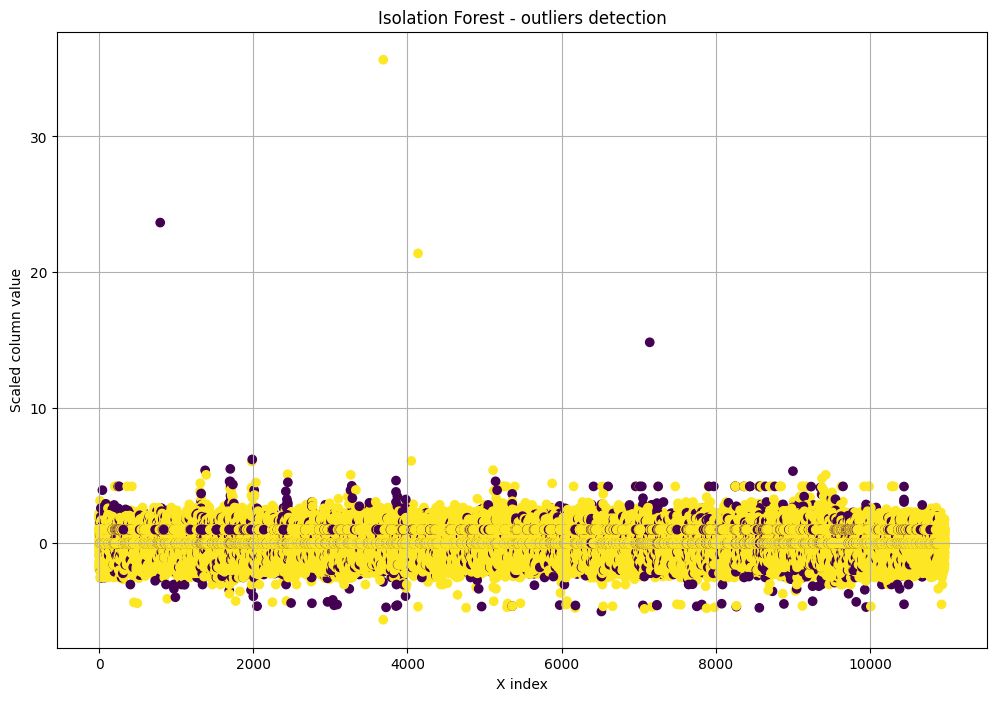

In [16]:
from sklearn.ensemble import IsolationForest
from collections import Counter


if_clf = IsolationForest(random_state=123)
if_clf.fit(X)

outliers_preds = if_clf.predict(X)

print(f"number of samples(1) and outliers (-1): {Counter(outliers_preds)}")

plt.figure(figsize=(12, 8))
for column in X.columns:
    plt.scatter(
        range(len(X)), 
        X[column], 
        c=outliers_preds, 
        cmap="viridis"
    )

plt.title("Isolation Forest - outliers detection")
plt.xlabel("X index")
plt.ylabel("Scaled column value")
plt.grid()
plt.show()

In [18]:
# let's remove outliers

outliers_index = np.where(outliers_preds == -1)[0]
len(outliers_index)

998

In [19]:
df[~df.index.isin(outliers_index)]["client_type"].apply(lambda x: 1 if x == "default" else 0)

0        1
1        1
2        1
3        1
4        1
        ..
10965    0
10966    0
10967    0
10968    0
10969    0
Name: client_type, Length: 9972, dtype: int64

In [20]:
X_ready = X[~X.index.isin(outliers_index)] \
            .reset_index(drop=True)
y_ready = df[~df.index.isin(outliers_index)] \
            .reset_index(drop=True) \
            ["client_type"].apply(lambda x: 1 if x == "default" else 0)

In [21]:
from sklearn.model_selection import train_test_split

seed = 123
X_train, X_test, y_train, y_test = train_test_split(
    X_ready, y_ready, random_state=seed, train_size=0.8
)

X_train.shape, X_test.shape

((7977, 34), (1995, 34))

In [22]:
y_train.value_counts()

client_type
0    7031
1     946
Name: count, dtype: int64

In [23]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=seed)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

Counter(y_train_rus)

Counter({0: 946, 1: 946})

In [24]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=seed)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
y_train_ros.value_counts()

client_type
0    7031
1    7031
Name: count, dtype: int64

In [25]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = seed)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
y_train_smote.value_counts()

client_type
0    7031
1    7031
Name: count, dtype: int64

In [26]:
from imblearn.under_sampling import NearMiss 
nr = NearMiss()

X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train)
y_train_miss.value_counts()

client_type
0    946
1    946
Name: count, dtype: int64

In [27]:
df_raw.columns

Index(['clientid', 'client_type', 'ratio', 'loan_type', 'loan_initial_term',
       'loan_initial_amount', 'loan_to_value_ratio', 'annual_percentage_rate',
       'monthly_interest_rate', 'region', 'branch', 'client_gender', 'income',
       'vehicle_production_year', 'vehicle_initial_assessment_value', 'age',
       'had_car_loan', 'had_other_loans'],
      dtype='object')

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

train_pair = [(X_train, y_train, "simple_train"), 
              (X_train_rus, y_train_rus, "random under sampling"),
              (X_train_ros, y_train_ros, "random over sampling"), 
              (X_train_smote, y_train_smote, "smote"),
              (X_train_miss, y_train_miss, "near miss")]

for X_train, y_train, pair_str in train_pair:
    print("\n", pair_str)

    rf_clf = RandomForestClassifier(random_state=seed,
                                   n_estimators=1000, max_depth=6)
    # rf_clf.fit(X_train_rus, y_train_rus)
    rf_clf.fit(X_train, y_train)
    rf_preds = rf_clf.predict(X_test)
    
    print(classification_report(y_test, rf_preds))
    print("confusion matrix")
    print(confusion_matrix(y_test, rf_preds))
    print(f"roc_auc_score: {roc_auc_score(y_test, rf_preds)}")


 simple_train


/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pawel/Desktop/civitta_task/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1755
           1       0.00      0.00      0.00       240

    accuracy                           0.88      1995
   macro avg       0.44      0.50      0.47      1995
weighted avg       0.77      0.88      0.82      1995

confusion matrix
[[1755    0]
 [ 240    0]]
roc_auc_score: 0.5

 random under sampling
              precision    recall  f1-score   support

           0       0.94      0.63      0.76      1755
           1       0.21      0.71      0.32       240

    accuracy                           0.64      1995
   macro avg       0.58      0.67      0.54      1995
weighted avg       0.85      0.64      0.71      1995

confusion matrix
[[1113  642]
 [  69  171]]
roc_auc_score: 0.673344017094017

 random over sampling
              precision    recall  f1-score   support

           0       0.93      0.67      0.78      1755
           1       0.21      0.65      0.32       

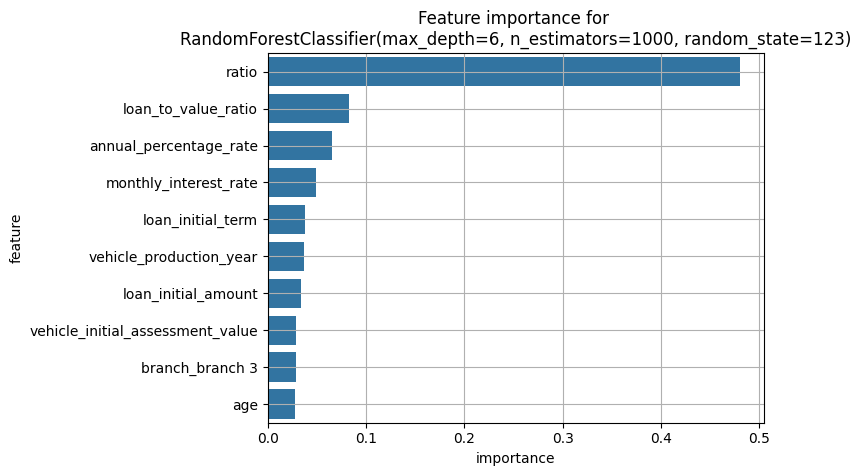

In [33]:
def display_feature_importance(clf):
    df_importance = pd.DataFrame(
        {"feature": clf.feature_names_in_, 
        "importance": clf.feature_importances_}
    ).sort_values("importance", ascending=False).iloc[:10, :]
    sns.barplot(data=df_importance, x="importance", y="feature")
    plt.title(f"Feature importance for \n{clf}")
    plt.grid()

display_feature_importance(rf_clf)

In [30]:
shap_values.shape

(2023, 35, 2)

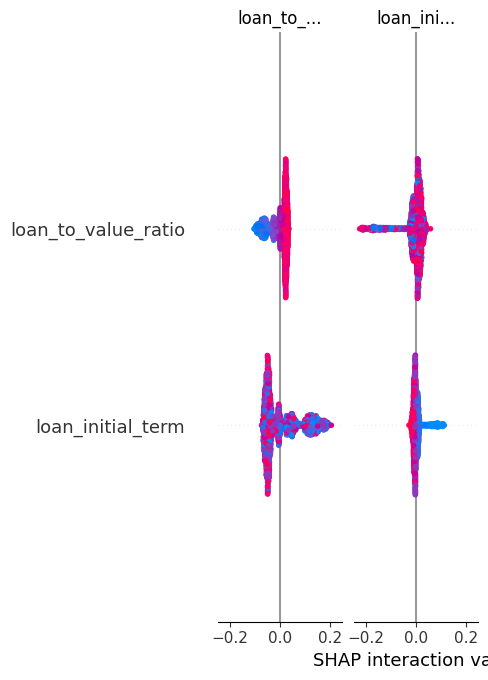

In [34]:
import shap

explainer = shap.TreeExplainer(rf_clf)
shap_values = explainer.shap_values(X_test, y_test)
shap.summary_plot(shap_values, X_test)

### XGBoost

In [24]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators=100, objective="binary:logistic")
xgb_clf.fit(X_train_rus, y_train_rus)
xgb_preds = xgb_clf.predict(X_test)

print(classification_report(y_test, xgb_preds))
print("confusion matrix")
print(confusion_matrix(y_test, xgb_preds))
print(f"roc_auc_score: {roc_auc_score(y_test, xgb_preds)}")

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      1773
           1       0.39      0.80      0.53       250

    accuracy                           0.82      2023
   macro avg       0.68      0.81      0.71      2023
weighted avg       0.90      0.82      0.85      2023

confusion matrix
[[1465  308]
 [  50  200]]
roc_auc_score: 0.813141567963903


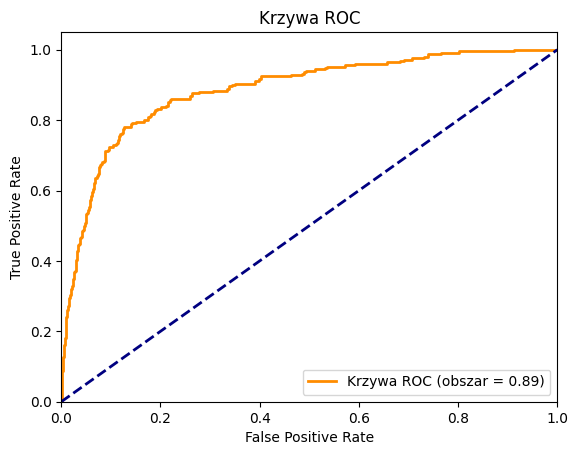

NameError: name 'probs' is not defined

In [29]:
from sklearn.metrics import roc_curve, auc

xgb_proba = xgb_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, xgb_proba)

# Wyświetl krzywą ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Krzywa ROC (obszar = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC')
plt.legend(loc="lower right")
plt.show()

# Znajdź indeks progu dla wybranej wartości progu (np. 0.6)
idx = next(i for i, threshold in enumerate(thresholds) if threshold >= 0.6)

# Ustaw próg klasyfikacji
threshold = thresholds[idx]

# Klasyfikuj dane z wybranym progiem
predicted = (probs >= threshold).astype(int)

print("Wybrany próg:", threshold)
print("Klasyfikacja z wybranym progiem:", predicted)